# Reinforcement Learning

## What is Reinforcement Learning?



Reinforcement learning (RL) is a subset of machine learning focused on how agents take actions in an environment to maximize rewards. Unlike supervised learning, which relies on labeled data, RL learns through trial and error, where agents receive feedback (rewards or penalties) based on their actions.

A helpful way to think about reinforcement learning is to compare it to training a puppy. Just like you reward a puppy with treats for good behavior—like sitting or fetching a ball—you can use rewards to encourage the agent to make the right decisions. If the puppy misbehaves, you might scold it to discourage that behavior.

Similarly, in reinforcement learning, the agent receives positive feedback (rewards) for actions that lead to desired outcomes and negative feedback (penalties) for actions that result in undesirable outcomes. Over time, just as a puppy learns to associate certain behaviors with treats or scoldings, the agent learns to make better decisions to maximize its rewards. This trial-and-error approach helps both the puppy and the agent develop the skills they need to succeed.


## RAICE: An Example Scenario

Imagine we want to train an AI to drive a race car. Instead of feeding it millions of simulations of actual drives and races (which we might not have), we could use RL. The car could receive positive rewards for:

- Increasing its distance on the track

- Maintaining a high speed


Conversely, if the car crashes, it would be penalized and have to restart, much like a level in a video game.

### The Environment

In our scenario, we'll use the Bahrain F1 track as our environment. The track is represented by black and white pixels, with black representing the asphalt and white representing the background.

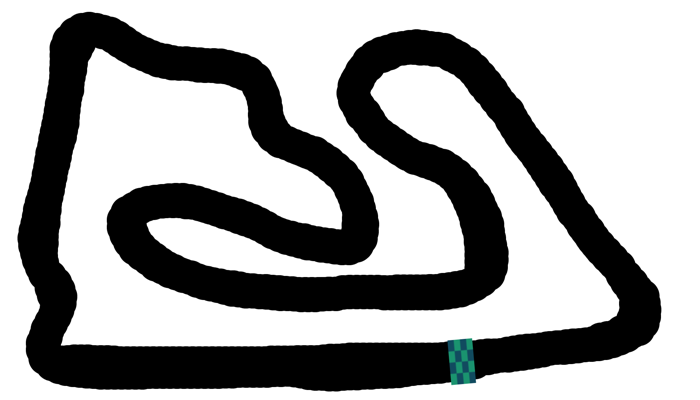

In [1]:
from PIL import Image,ImageDraw,ImageFont
from IPython.display import display
import math

track = Image.open("../maps/bahrain2.png").resize((700,400))
track

### The Agent

Our agent is a car equipped with five sensors positioned at 90, 45, 0, -45, and -90 degrees. These sensors detect nearby walls, providing crucial information about the environment.

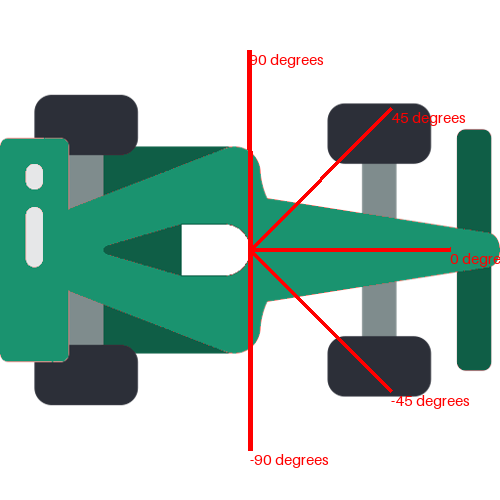

In [2]:

# Load the existing image
car = Image.open("../qlearning/car.png").resize((500, 500))

center = int(500/2)


# Create a draw object
draw = ImageDraw.Draw(car)

# Define font (default font if not specifying a path)
font = ImageFont.load_default(size=15)

# Define the angle and text positions
angle = 0
text_positions = []

for d in range(-90, 120, 45):
    x = int(center + 200 * math.cos(math.radians(360 - (angle + d))))
    y = int(center + 200 * math.sin(math.radians(360 - (angle + d))))
    draw.text((x,y), f'{d} degrees', fill='red', font=font)  # Black text
    draw.line([(center,center), (x, y)], fill='red', width=5) 

# Display the modified image
display(car)

### The State $s$ 

In reinforcement learning, a state $s$ refers to a particular configuration of the environment at a specific moment. It includes all the essential information the agent requires to make decisions about its actions. In this context, the state can encompass various factors, such as the car's position on the track and its direction. However, the most critical elements will be the sensor readings, as they provide sufficient information for decision-making. This is similar to how humans drive; we primarily rely on what we see in front of us to navigate effectively.

### The Actions $a$ 



The car has four possible actions $a$ it can take:

1. **Speeding Up**: The car increases its speed, allowing it to cover more distance quickly.
  
2. **Slowing Down**: The car decreases its speed, which helps in navigating tight corners or avoiding obstacles.

3. **Turning Left 30 Degrees**: The car shifts its direction to the left by 30 degrees, enabling it to navigate turns or avoid walls on that side.

4. **Turning Right 30 Degrees**: Similarly, the car can turn right by 30 degrees to adjust its trajectory or avoid obstacles on the right side.

These actions allow the car to respond dynamically to its environment and make strategic decisions during the race. As you may be wondering right now, there could be many more, but for now lets keep it simple.


![Alt text](../images/actions.png)

### The Reward $r$

Shaping the reward $r$ among the actions taken by the car can be quite complicated. It involves iterating through numerous scenarios to determine which actions lead to the best outcomes and how to distribute rewards effectively.

However, I can provide a method (for free, your welcome) that I have already tested and seems to work:

In [3]:

def reward(distance, velocity):
    total_reward = 0.7 * distance + 0.3 * velocity
    print(f"The total reward is {total_reward}")



By using this straightforward approach, such as assigning rewards based on clear metrics—like distance traveled and speed achieved—we can streamline the training. This way, the car can learn more efficiently without the complexities of intricate reward-sharing algorithms. 

For example, let's say our agent has covered a distance of 10 meters and is traveling at a speed of 10. In this case, our reward will be:

In [4]:
reward(distance=10, velocity=10) # The total reward is 10.0
reward(distance=10, velocity=5) # The total reward is 8.5 if we slow down, the reward decreases

The total reward is 10.0
The total reward is 8.5


The reward will decrease, which is exactly what we want. Same happens with distance. This decay in reward reinforces the importance of maintaining speed, encouraging the agent to optimize its performance on the track.

### Exploration vs. Exploitation

Finally, before we delve into the actual algorithms, it’s important to discuss a key concept: the exploration-exploitation trade-off.

Consider the scenario of choosing a restaurant for dinner tonight:

- You might opt for a new, trendy restaurant that just opened in your neighborhood. While this choice carries the uncertainty of not knowing whether the food will be enjoyable or if the atmosphere will fit your tastes, it also holds the potential for discovering your new favorite dining spot.

- Alternatively, you could stick with the restaurant you already love, the one you visit every month. This decision guarantees a satisfying meal because you're familiar with the menu and know the quality of the food. However, it lacks the excitement of trying something new and doesn't offer any fresh experiences.


In reinforcement learning, the **exploration-exploitation** trade-off mirrors this restaurant dilemma. The agent faces a choice between exploring new actions that could lead to better outcomes and exploiting known strategies that yield reliable rewards. Exploration allows the agent to gather valuable information about its environment and discover potentially superior actions. However, it may also result in suboptimal performance in the short term. On the other hand, exploitation enables the agent to maximize immediate rewards based on previous experiences, but it can prevent the agent from finding better strategies. Balancing these two approaches is critical for the agent's long-term success, whether it involves trying new racing lines or fine-tuning speed adjustments in a racing context.

### Training the Agent




To train the agent, we need it to learn a policy $π$ (strategy for maximizing rewards). There are several approaches:

1. **Direct Policy Optimization $π$**: In this method, we directly optimize the policy itself. The agent learns which actions to take in various states to maximize its cumulative rewards over time.

2. **Value Function Learning** : Alternatively, we can learn a value function that estimates the expected value of being in a given state. This function helps the agent understand the potential long-term rewards associated with different states, guiding its decision-making process. This Value function can be seen as a table where we have states as columns and actions as rows. But what if we have many combinations of those? Thats where neural networks comes in. We will have a neural network to learn that value function for us.

3. **Model based**. They will not be covered in this course. But essentially they utilize a model of the environment to predict future states and rewards, enabling the agent to plan and make informed decisions by simulating various scenarios before taking actions.

By employing either of these methods, we can effectively train the agent to navigate its environment and achieve its racing goals.


The formal way to write the value function is as follows:
 
$$
v_π(s) = E_π[R_{t+1} + γR_{t+2} + γ^2R_{t+3} + … | S_t = s]
$$
 
This means that the value of a state $s$ using the policy $π$ is the expected discounted return starting from state $s$.

There are two types of policies

- Deterministic: Always returns the same action for the same state $(a = π(s))$
- Stochastic: Outputs a probability distribution over actions $(π(a|s) = P[A|s])$

### On-Policy vs. Off-Policy Learning



In reinforcement learning, understanding the difference between on-policy and off-policy learning is essential for effective agent training:

- **On-Policy Learning**: The agent learns and improves its policy based on actions taken while interacting with the environment. It evaluates and updates the policy using the same strategy it employs during exploration. An example is SARSA, which leads to consistent learning but may limit exploration of alternative strategies.

- **Off-Policy Learning**: The agent learns a policy from data generated by a different policy, allowing it to explore various strategies without being tied to its current actions. A well-known example is Q-Learning, where the agent updates its value function based on the best possible actions, promoting greater exploration and more efficient learning.

Understanding these differences helps in choosing the right learning approach for specific reinforcement learning scenarios.

## Algorithms

Now that we have a foundational understanding of how reinforcement learning operates, let’s explore the driver’s grid—also known as the algorithms we’ll be studying in this course:

![Alt text](../logos/race.png)


- 🏁  **Blue Cars**: These represent Policy-Based Algorithms (e.g., Proximal Policy Optimization, PPO). These agents learn a policy directly by optimizing the expected return, focusing on selecting the best action in each state.

- 🏁  **Green Cars**: These correspond to Value-Based Algorithms (e.g., DQN, SARSA). These agents learn to estimate the value of actions and states, aiming to improve decision-making based on long-term expected rewards.

- 🏁  **Both Colors (Blue + Green)**: These cars utilize Hybrid Algorithms that combine both policy-based and value-based approaches, such as Actor-Critic methods, where one part learns the policy and another learns the value function.

- 🏁  **(Optional) White Cars**: Indicate the use of a Genetic Algorithm. These cars evolve over time through selection, mutation, and crossover, mimicking natural evolution to optimize their behavior. 


--- 

<div style="display: flex; align-items: center;">
    <img src="../images/flag.png" alt="Description of the image" style="width: 100px; height: auto;">
    <h3 style="margin-right: 20px;">Markov Decision Process (MDP)</h1>
</div>

The Markov property is a cornerstone concept in Markov Decision Processes (MDPs) and reinforcement learning. It can be summarized as follows:
Markov Property:

- The future state depends solely on the current state and action

- Past states and actions are irrelevant for predicting the future

- "The future is independent of the past given the present"


Mathematically: 

$$
P(S_{t+1} | S_t, A_t) = P(S_{t+1} | S_t, A_t, S_{t-1}, A_{t-1}, ...)
$$

Key aspects:

- Memoryless: The system doesn't retain or need information about past states

- Predictability: Future states can be predicted using only the current state and action

- Simplification: Significantly reduces the complexity of decision-making processes

- Mathematical formulation: $P(S_{t+1} | S_t, A_t) = P(S_{t+1} | S_t, A_t, S_{t-1}, A_{t-1}, ...)$

This property allows for more efficient computations in MDPs and simplifies the design of RL algorithms. However, it may not always perfectly capture all real-world scenarios.
RL algorithms leverage the Markov property to focus on learning value functions and policies based solely on current states, without considering entire historical trajectories. This greatly reduces computational complexity and memory requirements.
For problems where historical context is important, techniques like recurrent neural networks or state augmentation can be used to incorporate relevant past information into the current state representation.